In [18]:
#imports

import numpy as np
import matplotlib.pyplot as plt

import time

from IPython.utils import io

# for testing purposes only
from sklearn.metrics import mean_squared_error

from keras.datasets import mnist

## 1. Formatting Data
Downloading and formatting data


**Note: From the keras dataset there are 60000 training samples instead of 50000 samples, so this code will account for that number.**

In [3]:
# loading datasets
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# normalize data
train_X , test_X = train_X/255.0 , test_X/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# 60000 training samples
# 10000 testing samples

print('Training data shape: ' + str(train_X.shape))
print('Test data shape:  '  + str(test_X.shape))


Training data shape: (60000, 28, 28)
Test data shape:  (10000, 28, 28)


In [5]:
# vectorize inputs

X_train = train_X.reshape(train_X.shape[0], -1)
X_test = test_X.reshape(test_X.shape[0], -1)

num_classes = len(np.unique(train_y))
N = X_train.shape[0]

In [6]:
print('Training data shape: ' + str(X_train.shape))
print('Test data shape:  '  + str(X_test.shape))

Training data shape: (60000, 784)
Test data shape:  (10000, 784)


## 2. Mini Batch SGD Implementation

In [ ]:
onehot_encoded = list()

for value in train_y:
	letter = [0 for _ in range(10)]
	letter[int(value)] = 1
	onehot_encoded.append(letter)
print(np.array(onehot_encoded))
onehot_encoded = np.array(onehot_encoded)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [ ]:
def calculate_loss(W, X, Y):
  return (1/(2 * len(X))) * np.sum((np.matmul(X,W) - Y)**2)


def calculate_gradient(X_ri, Y_ri, W, batch_size):
  return (1/batch_size) * np.matmul(X_ri.transpose(), (np.matmul(X_ri, W) - Y_ri))

def SGD(X, Y, iters, batch_size=1, learning_rate=0.00001, num_classes=10, tol=pow(10, -5)):
  loss_history, weights = [], []
  W = np.zeros((X.shape[1], num_classes))

  for iter in range(iters):

    # Compiling batch values
    r = np.random.randint(low=0, high=X.shape[0], size=batch_size)

    X_batch = X[r]
    Y_batch = Y[r]

    # Calculating loss
    # loss = mean_squared_error(Y, np.matmul(X, W))
    loss = calculate_loss(W, X_batch, Y_batch)
    loss_history.append(loss)

    if (iter + 1) % 20 == 0:
      print('Loss value at epoch {}: {}'.format(iter + 1, loss))

    # Check for convergence
    if iter > 1:
        if np.absolute(loss_history[iter] - loss_history[iter-1])/loss_history[iter-1] <= tol:
          print(f'Convergence criteria met @ iteration {iter + 1}')
          break

    # Calculating gradient
    grad = calculate_gradient(X_batch, Y_batch, W, batch_size)

    # Update weights
    W = W - (learning_rate * grad)

    # For accuracy graphs later
    weights.append(W)

  return W, loss_history, iter, weights

In [ ]:
W, loss, _, weights = SGD(X_train, onehot_encoded, iters=100, batch_size=10, learning_rate=0.001)

Convergence criteria met @ iteration 12


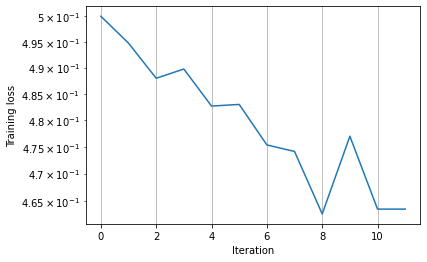

In [ ]:
plt.semilogy(loss[0:100])    
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Training loss') 
plt.show()    

In [ ]:
def predict(X,w):
  # your code goes here 
  
  yhat = np.matmul(X, w)
  yhat = [np.argmax(probs) for probs in yhat]

  return yhat

In [ ]:
accuracies = []
for weight in weights:
  yhat = predict(X_test, weight)
  acc = np.mean(yhat == test_y)
  accuracies.append(acc)

print(accuracies)

[0.151, 0.2578, 0.3158, 0.3555, 0.3614, 0.3565, 0.3325, 0.4434, 0.3657, 0.3524, 0.3036]


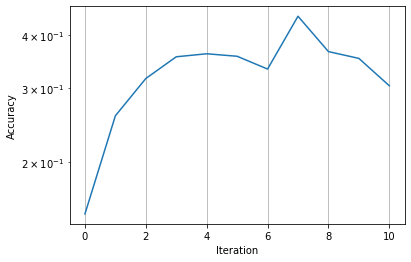

In [ ]:
plt.semilogy(accuracies) 
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
yhat = predict(X_test, W)
acc = np.mean(yhat == test_y)
print("Test 2 accuracy = %f" % acc)

Test 2 accuracy = 0.303600


## 3. The Role of Batch Size
Testing batch sizes of 1, 10, 100, 1000

For each batch size,
* determine a good choice of learning rate
* pick ITR sufficiently large to ensure the (approximate) convergence of the training loss
* Plot the progress of training loss (y-axis) as a function of the iteration counter t (x-axis)
* Report how long the training takes (in seconds).
* Plot the progress of the test accuracy (y-axis) as a function of the iteration counter t (x-axis)


#### **NOTE**: Performing the above for the best learning rate found for each batch size

Highest accuracy @ batch size 1 with learning_rate 1e-07: 0.7784


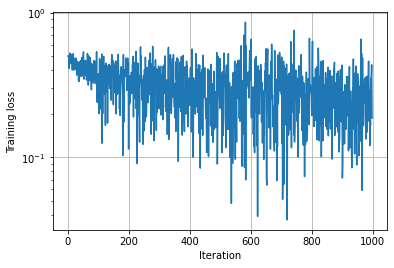

Total time taken for training phase: 0.3675830364227295



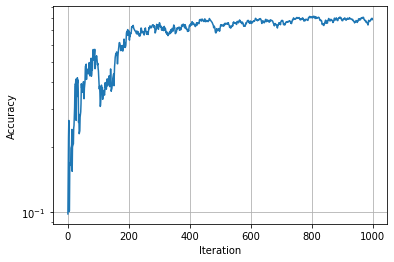


Highest accuracy @ batch size 10 with learning_rate 1e-07: 0.8342


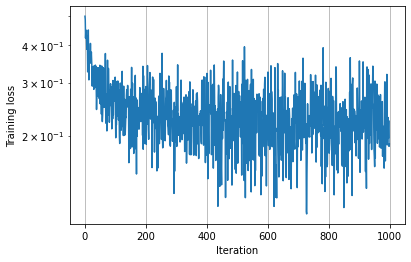

Total time taken for training phase: 0.19386720657348633



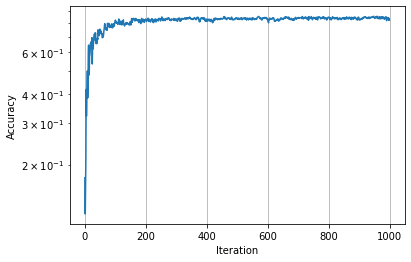


Highest accuracy @ batch size 100 with learning_rate 1e-07: 0.8547


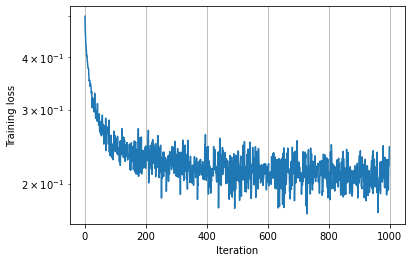

Total time taken for training phase: 1.300710678100586



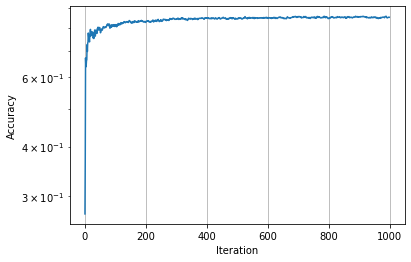


Highest accuracy @ batch size 1000 with learning_rate 1e-07: 0.857


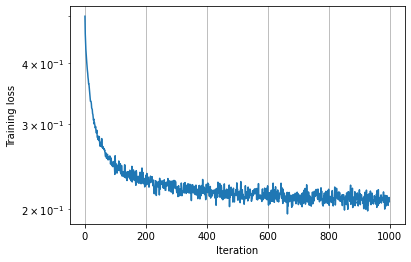

Total time taken for training phase: 8.914470195770264



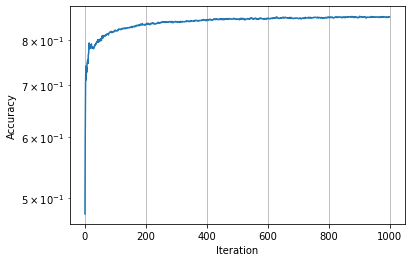

In [ ]:
batch_sizes = [1, 10, 100, 1000]

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]

for bs in batch_sizes:
  final_accuracies, all_accuracies, times, final_weights, all_weights, loss_history, iters = [], [], [], [], [], [], []

  for lr in learning_rates:
    start_time = time.time()
    # Surpress output
    with io.capture_output() as captured:
      W, loss, iter, weights = SGD(X_train, onehot_encoded, iters=1000, batch_size=bs, learning_rate=lr)
    end_time = time.time()

    times.append(end_time - start_time)
    final_weights.append(W)
    iters.append(iter)
    loss_history.append(loss)
    all_weights.append(weights)

    yhat = predict(X_test, W)
    acc = np.mean(yhat == test_y)
    final_accuracies.append(acc)
  
  best = np.argmax(final_accuracies)

  print(f'Highest accuracy @ batch size {bs} with learning_rate {lr}: {final_accuracies[best]}')

  plt.figure()
  plt.semilogy(loss_history[best][0:iters[best]])    
  plt.grid()
  plt.xlabel('Iteration')
  plt.ylabel('Training loss') 
  plt.show()

  print(f'Total time taken for training phase: {times[best]}')
  print()

  # Calculating accuracies per iteration
  for weights in all_weights[best]:
    yhat = predict(X_test, weights)
    acc = np.mean(yhat == test_y)
    all_accuracies.append(acc)

  plt.figure()
  plt.semilogy(all_accuracies[0:iters[best]]) 
  plt.grid()
  plt.xlabel('Iteration')
  plt.ylabel('Accuracy')
  plt.show()

  print()

The highest accuracy after a few runs was between 85 and 86%. The highest accuracy found was also always using the smallest learning rate, however the runs with the smallest learning rate took the most time, so there is some tradeoff to be noted in practice.

The accuracy of each model increases over iterations as expected, but as per the graphs above, the accuracy plateues relatively quickly and improvements are limited after that point.

### NOTE:
I wasn't able to run the code to calculate and plot accuracies (colab was limited my memory and I wasn't able to run all the calculations) but I have the code in the cell above. 

##4.  Batch Size Analysis

It seems as though batch size does have an effect on the overall accuracy of the model. Based on the results above, increasing the batch size improves the accuracy up to a certain point. However, the tradeoff is that the amount of time taken also increases based on the batch size. There also seems to be a limit to how much increasing the batch size increases the accuracy, as the accuracy did not improve much from batch size 100 to 1000.

## 5. The Role of Training Data Set

In [ ]:
N = [100, 500, 1000, 10000]

for n in N:

  subset = np.random.choice(range(X_train.shape[0]), size=n, replace=False)

  X_sub = X_train[subset]
  Y_sub = train_y[subset]

  onehot_encoded = list()

  for value in Y_sub:
    letter = [0 for _ in range(10)]
    letter[int(value)] = 1
    onehot_encoded.append(letter)
  onehot_encoded = np.array(onehot_encoded)

  with io.capture_output() as captured:
    W, loss, iter, weights = SGD(X_sub, onehot_encoded, iters=1000, batch_size=100, learning_rate=0.00001)

  yhat = predict(X_test, W)
  acc = np.mean(yhat == test_y)
  print(f'Accuracy with subset training set of size {n}: {acc}')

Accuracy with subset training set of size 100: 0.4137
Accuracy with subset training set of size 500: 0.2687
Accuracy with subset training set of size 1000: 0.361
Accuracy with subset training set of size 10000: 0.622


As we can see above, increase the amount of training data used increases the performance of the model. That said, the more data that can be used for training the better the accuracy will be in most cases. 

In the case above, increasing the training set size by 10x (100 -> 10000) increased the accuracy of the model by around 30%, which is a substantial increase.

## 6. BONUS: Simpler Life

Running a linear MNIST classifier using PyTorch to compare results

Source: https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817?gi=d55282bcbc84

In [8]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):

  def __init__(self, inputSize, outputSize):
      super(linearRegression, self).__init__()
      self.linear = torch.nn.Linear(inputSize, outputSize)

  def forward(self, x):
      out = self.linear(x)
      return out

In [9]:
inputDim = 784        # takes variable 'x' 
outputDim = 10       # takes variable 'y'

model = linearRegression(inputDim, outputDim)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

https://stackoverflow.com/questions/51735001/how-to-include-batch-size-in-pytorch-basic-example

In [10]:
from torch.utils.data import DataLoader, TensorDataset


onehot_encoded = list()

for value in train_y:
	letter = [0 for _ in range(10)]
	letter[int(value)] = 1
	onehot_encoded.append(letter)
onehot_encoded = np.array(onehot_encoded)

inputs = Variable(torch.from_numpy(X_train))
labels = Variable(torch.from_numpy(onehot_encoded))

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

onehot_encoded = list()

for value in test_y:
	letter = [0 for _ in range(10)]
	letter[int(value)] = 1
	onehot_encoded.append(letter)
onehot_encoded = np.array(onehot_encoded)

inputs = Variable(torch.from_numpy(X_test))
labels = Variable(torch.from_numpy(onehot_encoded))

test_dataset = TensorDataset(inputs, labels)
test_dataloader = DataLoader(test_dataset, batch_size=100, shuffle=True)

In [20]:
for epoch in range(100):

    for id_batch, (x_batch, y_batch) in enumerate(dataloader):

      # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
      optimizer.zero_grad()

      # get output from the model, given the inputs
      outputs = model(x_batch.float())

      # get loss for the predicted output
      loss = criterion(outputs, y_batch.float())

      # get gradients w.r.t to parameters
      loss.backward()

      # update parameters
      optimizer.step()

    if (epoch + 1) % 20 == 0:
      print('epoch {}, loss {}'.format(epoch + 1, loss.item()))

KeyboardInterrupt: ignored

https://stackoverflow.com/questions/52176178/pytorch-model-accuracy-test

In [16]:
def check_accuracy(test_loader: DataLoader, model: torch.nn.Module, device):
    num_correct = 0
    total = 0
    model.eval()

    with torch.no_grad():
        for data, labels in test_loader:
            data = data.float().to(device=device)
            labels = labels.float().to(device=device)

            predictions = model(data)

            num_correct += (predictions.round() == labels).sum()
            total += labels.size(0)

        print(f"Test Accuracy of the model: {float(num_correct)/float(total)*100:.2f}")

        return float(num_correct)/float(total)*100

In [ ]:
onehot_encoded = list()

for value in test_y:
	letter = [0 for _ in range(10)]
	letter[int(value)] = 1
	onehot_encoded.append(letter)
print(np.array(onehot_encoded))
onehot_encoded = np.array(onehot_encoded)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
inputs = Variable(torch.from_numpy(X_test))
labels = Variable(torch.from_numpy(onehot_encoded))

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

check_accuracy(dataset, model, None)

Test Accuracy of the model: 89.46


89.461

## Analysis
The accuracy of the PyTorch model was higher than my own by around 10%. This may be due to the optimizer used for the PyTorch model, as my own computations did not use any such optimizations. Other than that, the other parameters were the same as the initial run. The linear layer computation should be the same in both models, so the increase in performance can probably be attributed to the optimizations. The loss function being used for the PyTorch model is also MSE, instead of standard squared loss. 